# Replication assignment

Replicate the results found in [Bryant et al  (2010)](https://doi.org/10.1016/j.techfore.2009.08.002), [Rozenberg et al (2014)](https://link.springer.com/content/pdf/10.1007/s10584-013-0904-3.pdf), and [Hamarat et al (2013)](https://doi.org/10.1016/j.techfore.2012.10.004). The data files are named accordingly. You can also look at [Kwakkel & Jaxa-Rozen (2016)](https://www.sciencedirect.com/science/article/pii/S1364815215301092), which gives a succint summary of these three cases. 

An additional useful, if dated, resource for Bryant et al is https://waterprogramming.wordpress.com/2015/08/05/scenario-discovery-in-python/ 



In [2]:
import pandas as pd
import numpy as np
from ema_workbench.analysis import prim
from ema_workbench import ema_logging
from ema_workbench.util.utilities import load_results
import matplotlib.pyplot as plt

# Bryant & Lempert

Load the data using pandas. The experiments are in colums 2-10, while the outcome is in column 15. If you look at the paper carefully, you will see that they change the peel_alpha in PRIM. This controls the leniency of the algorithm.


In [3]:
df = pd.read_csv('data/Bryant et al 2010.csv',index_col=False)


In [4]:
df.head()

,renew req %,Pricing,Cellulosic cost,Total biomass,Feedstock distribution,Cellulosic yield,Oil elasticity,Demand elasticity,Electricity coproduction,oil supply shift,Biomass backstop price,input record,Expen change,Incremental cost,Less than 10%,Greater than 90%
0,0.25,1,124.900002,612.799988,0.04,89.500000,0.206,-0.469,1.83,0.078,162.199997,1001,60.00,276.47,0,0
1,0.25,1,67.300003,837.200012,0.18,95.900002,0.277,-0.380,0.01,-0.032,150.300003,1002,19.42,85.07,0,0
2,0.25,1,71.000000,740.400024,0.80,83.500000,0.445,-0.778,0.25,-0.093,135.800003,1003,17.76,200.11,0,0
3,0.25,1,80.099998,995.599976,0.58,82.400002,0.291,-0.334,0.08,-0.086,98.800003,1004,37.88,130.86,0,0
4,0.25,1,76.400002,476.399994,0.79,97.500000,0.443,-0.205,1.59,0.073,163.500000,1006,66.13,180.11,0,0


In [5]:
x = df.iloc[:,2:11]
y = df.iloc[:, 15].values

In [6]:
Prim1 = prim.Prim(x,y,threshold = 0.8, peel_alpha=0.1)
box1 = Prim1.find_box()

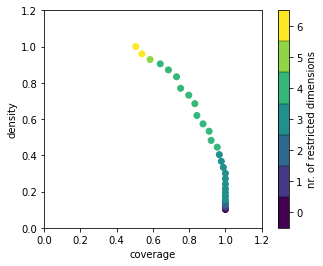

In [7]:
box1.show_tradeoff()

plt.show()

#### Reflection
The resulting box trade-off is logical. The prim algorithm iteratively divides the input space into smaller and smaller squares. As the dimensions get more restricted, the coverage of the total input space decreases. However this downside is mitigated by the increasing level of density in the remaining box. 
We can see that after the third dimension, diminishing returns in the density/coverage trade-off starts to occur.

coverage    0.730337
density     0.833333
id                22
mass        0.088435
mean        0.833333
res_dim            4
Name: 22, dtype: object

                            box 22                                           
                               min         max                      qp values
Total biomass           450.000000  755.799988  [-1.0, 3.975269312730579e-06]
Demand elasticity        -0.422000   -0.202000  [5.677298162579917e-18, -1.0]
Biomass backstop price  155.550003  199.600006   [7.74627840480414e-14, -1.0]
Cellulosic cost          72.650002  133.699997     [0.1039150022362067, -1.0]



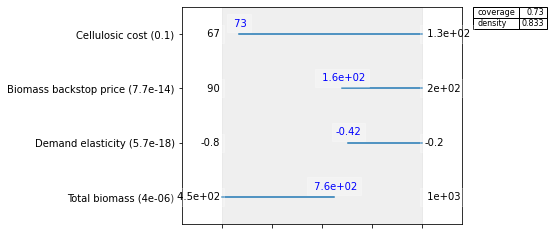

In [8]:
box1.inspect(22)
box1.inspect(22, style='graph')
plt.show()

#### Reflection

We can see that out of the four remaining dimensions, three appear to be statistically significant. Cellulosic cost has a qp calue of >0.05 and is therefore not a significant indicator. We also noticed that for "total biomass" the qp value was flipped. We assumed this to be a bug of some sort and moved on.

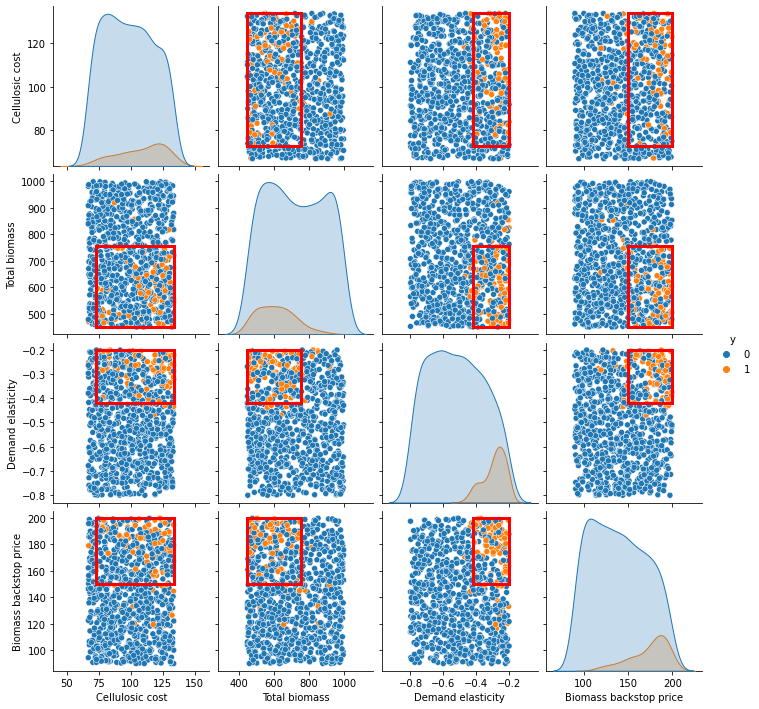

In [9]:
box1.select(21)
fig = box1.show_pairs_scatter()
plt.show()

# Rozenberg et al


* The experiments are the first seven columns. The remainder specify whether a given experiment belongs to a given SSP.
* Apply prim separately for each SSP
* you have to play with the threshold for each SSP, the default of 0.8 is at times too high
* if you look at the paper carefully, you will discover that they change some of the default parameters of PRIM


In [10]:
roz_df = pd.read_csv("data/Rozenberg et al 2014.csv")
roz_df.head(20)


,inequalities,convergence,population,behaviors,technologies,fossils,capital markets,SSP1,SSP2,SSP3,SSP4,SSP5
0,0,2,0,0,0,0,0,0,0,0,0,0
1,0,2,0,0,0,0,1,0,0,0,0,0
2,0,2,0,0,0,1,0,0,0,0,0,0
3,0,2,0,0,0,1,1,0,0,0,0,0
4,0,2,0,0,1,0,0,0,1,0,0,0
5,0,2,0,0,1,0,1,0,1,0,0,0
6,0,2,0,0,1,1,0,0,0,0,0,0
7,0,2,0,0,1,1,1,0,1,0,0,0
8,0,2,0,1,0,0,0,1,0,0,0,0
9,0,2,0,1,0,0,1,1,0,0,0,0


In [11]:
roz_x = roz_df.iloc[:,0:7]#.to_records(index=False)
SSP1 = roz_df.iloc[:, 7].values
SSP2 = roz_df.iloc[:, 8].values
SSP3 = roz_df.iloc[:, 9].values
SSP4 = roz_df.iloc[:, 10].values
SSP5 = roz_df.iloc[:, 11].values



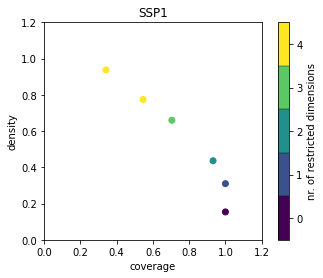

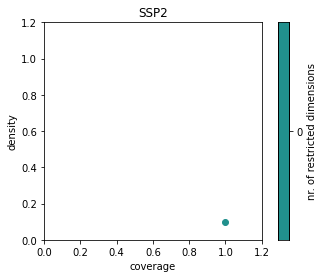

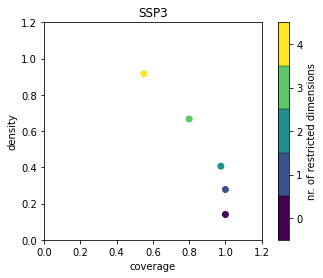

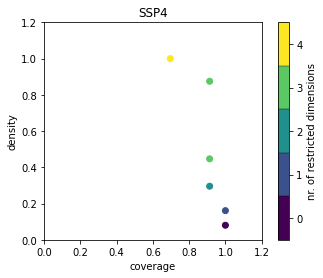

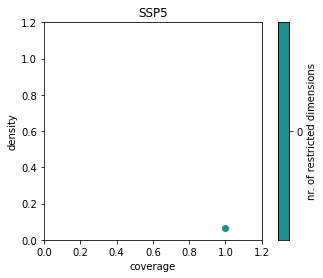

In [12]:
counter = 1
for Floris in [SSP1, SSP2, SSP3, SSP4, SSP5]:
    
    Prim1 = prim.Prim(roz_x,Floris,threshold = 0.8, peel_alpha=0.05)
    box1 = Prim1.find_box()

    box1.show_tradeoff()
    plt.title('SSP' + str(counter))
    plt.show()
    counter += 1

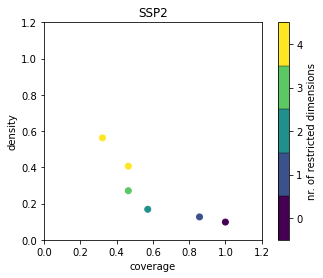

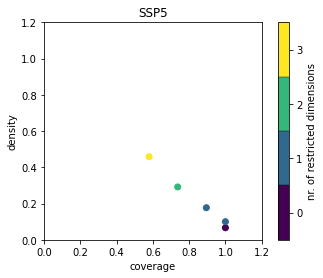

In [13]:
counter = 2
for Floris in [SSP2,SSP5]:
    
    Prim1 = prim.Prim(roz_x,Floris,threshold = 0.45, peel_alpha=0.05)
    box1 = Prim1.find_box()

    box1.show_tradeoff()
    plt.title('SSP' + str(counter))
    plt.show()
    counter += 3

# Hamarat et al

this is the most difficult dataset to analyze with prim. It has been generated using the ema_workbench and can be loaded with the `load_results` function. Experiments are of interest if the end state for `'fraction renewables'` is lower than the initial value.

* PRIM struggles with finding a good explanation for this case, why?
* [Dalal et al (2013)](https://www.sciencedirect.com/science/article/pii/S1364815213001345) suggest using PCA preprocessing. The ema_workbench supports this with the `pca_preprocess` function. See also examples/prim_PCA_preprocess.py. Does PCA preprocessing makes a difference for this case?


In [59]:
hamarat = load_results('data/Hamarat et al 2013.gz')

In [60]:
experiments = hamarat[0]
outcomes = hamarat[1]


In [61]:
outcomesdf = pd.DataFrame(outcomes['fraction renewables'])


experiments['interest'] = outcomesdf.apply(lambda x: 0 if x[0] < x[640] else 1, axis = 1)



In [62]:
experiments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 49 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   SWITCH Market price determination             5000 non-null   category
 1   SWITCH TGC obligation curve                   5000 non-null   category
 2   SWITCH carbon cap                             5000 non-null   category
 3   SWITCH carbon price determination             5000 non-null   category
 4   SWITCH economic growth                        5000 non-null   category
 5   SWITCH electrification rate                   5000 non-null   category
 6   SWITCH interconnection capacity expansion     5000 non-null   category
 7   SWITCH lookup curve TGC                       5000 non-null   category
 8   SWITCH low reserve margin price markup        5000 non-null   category
 9   SWITCH physical limits                        5000 n

In [63]:
xpart3 = experiments.iloc[:,0:46]
ypart3 = experiments.iloc[:, -1].values
xpart3

,SWITCH Market price determination,SWITCH TGC obligation curve,SWITCH carbon cap,SWITCH carbon price determination,SWITCH economic growth,SWITCH electrification rate,SWITCH interconnection capacity expansion,SWITCH lookup curve TGC,SWITCH low reserve margin price markup,SWITCH physical limits,...,progress ratio pv,progress ratio wind,starting construction time,time of nuclear power plant ban,uncertainty initial gross fuel costs,weight factor carbon abatement,weight factor marginal investment costs,weight factor technological familiarity,weight factor technological growth potential,year
0,1,2,3,2,5,1,1,2,1,2,...,0.847988,0.976581,0.813530,2045.490971,0.906060,8.761673,8.859864,4.240532,5.476591,0.939007
1,2,3,2,1,4,2,1,1,3,2,...,0.815255,0.852252,1.712138,2088.839530,0.741120,4.573769,4.300891,4.159390,9.782508,0.964794
2,1,3,1,1,3,6,4,2,4,1,...,0.761776,0.953124,0.390609,2013.876882,1.396959,9.374337,1.586548,2.431839,1.282010,1.070390
3,2,2,3,2,1,5,1,2,2,1,...,0.840963,0.941029,2.069449,2042.566070,1.034850,3.912941,8.038037,1.170614,4.865733,0.979062
4,1,2,3,3,4,5,1,2,2,1,...,0.805999,0.859009,1.094902,2051.277387,0.590479,3.663262,8.602380,7.392188,2.125345,1.073439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1,1,1,1,3,2,4,1,3,1,...,0.874160,0.972862,2.443080,2048.361066,1.382122,8.360590,6.078714,4.943982,1.285286,1.013162
4996,1,2,3,1,3,5,1,1,2,1,...,0.867439,0.962659,1.810992,2046.513779,0.706620,1.436440,4.835751,1.998337,4.328045,0.997881
4997,1,1,3,1,3,4,1,3,2,1,...,0.794317,0.862539,0.524648,2083.535742,1.244429,2.397216,9.297792,1.033138,7.460572,0.903423
4998,1,3,3,1,6,3,1,1,3,1,...,0.808424,0.929611,1.121825,2049.697171,0.585930,2.168406,9.630272,1.098442,9.564640,1.074167


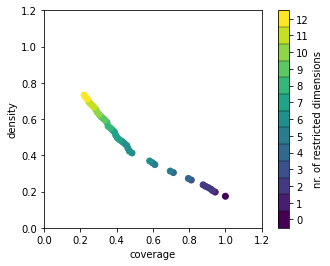

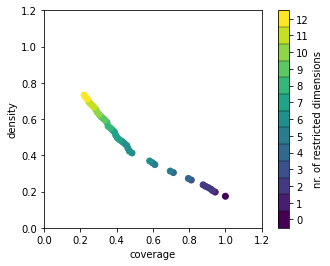

In [64]:
Prim3 = prim.Prim(xpart3,ypart3,threshold = 0.4, peel_alpha=0.05)
box3 = Prim3.find_box()
box3.show_tradeoff()

coverage    0.695752
density     0.313017
id                10
mass          0.3872
mean        0.313017
res_dim            5
Name: 10, dtype: object

                                          box 10                   \
                                             min              max   
economic lifetime wind                 20.000858        29.462388   
SWITCH electrification rate         {1, 2, 4, 5}     {1, 2, 4, 5}   
time of nuclear power plant ban      2032.384172      2099.996399   
SWITCH economic growth           {1, 2, 3, 4, 5}  {1, 2, 3, 4, 5}   
progress ratio wind                     0.857558         0.999986   

                                                                 
                                                      qp values  
economic lifetime wind              [-1.0, 0.22046818832834345]  
SWITCH electrification rate       [5.658852336910335e-10, -1.0]  
time of nuclear power plant ban   [3.171394782530556e-07, -1.0]  
SWITCH economic growth           [0

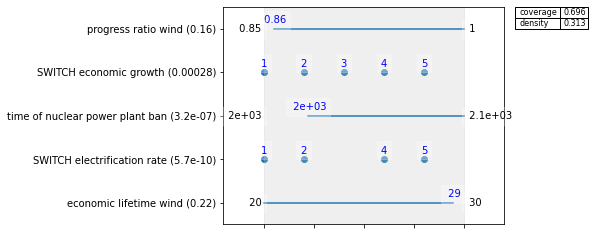

In [65]:
box3.inspect(10)
box3.inspect(10, style='graph')
plt.show()

In [66]:
experiments

,SWITCH Market price determination,SWITCH TGC obligation curve,SWITCH carbon cap,SWITCH carbon price determination,SWITCH economic growth,SWITCH electrification rate,SWITCH interconnection capacity expansion,SWITCH lookup curve TGC,SWITCH low reserve margin price markup,SWITCH physical limits,...,time of nuclear power plant ban,uncertainty initial gross fuel costs,weight factor carbon abatement,weight factor marginal investment costs,weight factor technological familiarity,weight factor technological growth potential,year,model,policy,interest
0,1,2,3,2,5,1,1,2,1,2,...,2045.490971,0.906060,8.761673,8.859864,4.240532,5.476591,0.939007,energy,no policy,1
1,2,3,2,1,4,2,1,1,3,2,...,2088.839530,0.741120,4.573769,4.300891,4.159390,9.782508,0.964794,energy,no policy,0
2,1,3,1,1,3,6,4,2,4,1,...,2013.876882,1.396959,9.374337,1.586548,2.431839,1.282010,1.070390,energy,no policy,0
3,2,2,3,2,1,5,1,2,2,1,...,2042.566070,1.034850,3.912941,8.038037,1.170614,4.865733,0.979062,energy,no policy,1
4,1,2,3,3,4,5,1,2,2,1,...,2051.277387,0.590479,3.663262,8.602380,7.392188,2.125345,1.073439,energy,no policy,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1,1,1,1,3,2,4,1,3,1,...,2048.361066,1.382122,8.360590,6.078714,4.943982,1.285286,1.013162,energy,no policy,0
4996,1,2,3,1,3,5,1,1,2,1,...,2046.513779,0.706620,1.436440,4.835751,1.998337,4.328045,0.997881,energy,no policy,1
4997,1,1,3,1,3,4,1,3,2,1,...,2083.535742,1.244429,2.397216,9.297792,1.033138,7.460572,0.903423,energy,no policy,0
4998,1,3,3,1,6,3,1,1,3,1,...,2049.697171,0.585930,2.168406,9.630272,1.098442,9.564640,1.074167,energy,no policy,0


In [67]:
xpart3 = xpart3.astype(int)

In [68]:
from ema_workbench.analysis.prim import pca_preprocess
x = pca_preprocess(xpart3, experiments['interest'])
x

C:\Users\bruno\anaconda3\envs\model_based_decision_making\lib\site-packages\ema_workbench\analysis\prim_util.py:177: RuntimeWarning: invalid value encountered in sqrt
  np.linalg.norm(eigen_vectors[:, i]) * np.sqrt(eigen_vals[i])


094e-02  5.466138e-02  ...   
 investors desired excess capacity investment -8.377788e-02  1.168786e-01  ...   
 maximum battery storage uncertainty constant -5.979626e-02 -1.507383e-01  ...   
 maximum no storage penetration rate pv        0.000000e+00  0.000000e+00  ...   
 maximum no storage penetration rate wind      0.000000e+00  0.000000e+00  ...   
 price demand elasticity factor                0.000000e+00  0.000000e+00  ...   
 price volatility global resource markets      0.000000e+00  0.000000e+00  ...   
 progress ratio biomass                        0.000000e+00  0.000000e+00  ...   
 progress ratio coal                          -2.559740e-01 -2.657518e-02  ...   
 progress ratio gas                            0.000000e+00  0.000000e+00  ...   
 progress ratio hydro                         -1.295502e-17 -2.848501e-16  ...   
 progress ratio igcc                          -3.429205e-19 -8.408988e-17  ...   
 progress ratio ngcc                           0.000000e+00  0.00000

In [69]:
x[0]

,r_0,r_1,r_2,r_3,r_4,r_5,r_6,r_7,r_8,r_9,...,r_36,r_37,r_38,r_39,r_40,r_41,r_42,r_43,r_44,r_45
0,-4.155702,-0.296817,0.410280,0.553933,0.071149,0.273443,-1.213402,0.066323,-0.366471,0.452198,...,-0.585469,1.067834,0.557690,0.320700,-0.176569,-0.068178,-0.462767,0.234780,0.057564,0.306075
1,3.792399,-0.296817,0.410280,0.553933,0.071149,0.273443,-1.213402,0.066323,-0.366471,0.452198,...,-0.585469,1.067834,0.557690,0.320700,-0.176569,-0.068178,-0.462767,0.234780,0.057564,0.306075
2,-0.080972,-0.478084,-1.913259,-0.623300,0.137464,1.350409,0.292644,1.612160,-1.380121,0.375450,...,-0.293998,-1.141059,-1.940055,-0.111129,0.536330,-2.403221,-0.866297,-0.731295,-0.680037,1.484572
3,-1.280847,-0.125047,-0.782692,0.650644,-0.433598,-0.192455,0.620682,0.642401,1.233318,-0.693772,...,-0.956471,-0.997496,-0.380325,-0.520840,-0.851085,2.603781,-0.962894,0.690791,-0.420221,-1.276550
4,-0.057468,-0.276715,0.003162,0.336137,-0.151769,-1.037053,1.372229,-0.786324,0.812287,-1.154763,...,-0.298395,-0.597472,0.175671,0.867433,0.641287,-1.751096,-1.258416,0.898792,-0.201092,-0.350486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.020165,0.327418,-0.693892,-0.213954,1.172402,1.232633,0.084133,-0.173811,0.077047,-1.172397,...,0.138164,1.486195,-0.244657,-0.206067,0.465979,-0.832297,-0.388908,-0.694829,-0.767745,0.379491
4996,0.924825,0.465154,0.341834,-0.121854,-0.460930,0.454316,0.618364,0.005423,1.056568,-0.535994,...,-1.928030,-1.121496,-0.060231,0.647650,0.794310,-0.194254,1.057345,0.769741,-0.506467,1.072171
4997,-0.602191,-0.486549,0.394811,1.797903,-1.276010,1.444171,-1.286100,-0.272499,0.707048,-0.844519,...,-0.335235,-0.419827,-0.566040,1.242107,-0.127326,0.198353,-1.868574,0.897536,2.431330,-0.552532
4998,1.009598,-1.210592,0.576724,0.595242,-0.800133,0.458446,-0.280014,-0.665157,-2.477237,-0.793640,...,-0.764095,1.052902,0.171250,0.441545,0.506462,1.276532,0.314498,2.350083,1.158244,0.965505


In [70]:
x[1]

,r_0,r_1,r_2,r_3,r_4,r_5,r_6,r_7,r_8,r_9,...,r_36,r_37,r_38,r_39,r_40,r_41,r_42,r_43,r_44,r_45
SWITCH Market price determination,2.516324e-01,-2.815313e-01,-2.020775e-01,-2.978750e-01,3.803368e-01,-1.185505e-01,-1.718101e-01,7.152516e-02,1.580165e-01,3.242206e-01,...,-2.598939e-02,-1.333892e-01,1.559582e-01,-3.148448e-02,-1.868485e-01,3.260809e-01,-7.357315e-02,-1.063358e-01,2.160895e-02,-4.184654e-01
SWITCH TGC obligation curve,1.541005e-01,-6.066230e-02,2.997910e-02,1.821391e-01,2.471959e-01,1.833579e-01,-6.478996e-03,5.736791e-02,-1.542202e-01,-1.652212e-01,...,-1.621659e-02,-1.202815e-01,-5.932370e-02,-5.135099e-02,-2.204980e-01,2.180745e-02,4.917155e-02,-6.386245e-02,-7.706228e-02,1.953543e-01
SWITCH carbon cap,-1.541005e-01,5.856865e-02,-7.732021e-02,-1.699392e-01,-3.075254e-01,-1.267997e-01,-3.578918e-02,-2.630154e-01,-1.977648e-02,-2.272237e-01,...,-4.916455e-01,3.917940e-03,1.947268e-01,1.932713e-01,1.152443e-01,-2.161920e-02,-2.601502e-02,6.403784e-02,9.848782e-02,-2.349375e-01
SWITCH carbon price determination,-1.541005e-01,8.539858e-02,-3.227962e-02,-1.925258e-01,-2.409550e-01,-1.730539e-01,1.115921e-01,-7.909960e-02,1.517772e-01,-5.665325e-02,...,3.626315e-01,-1.256015e-01,2.749233e-01,-8.156009e-03,1.514354e-01,6.068459e-03,-2.261935e-02,1.098909e-01,7.918372e-02,-2.471336e-01
SWITCH economic growth,-7.367380e-02,4.043612e-02,-6.324575e-02,-1.398778e-01,4.311001e-02,-9.474261e-02,1.033949e-01,-3.477824e-01,-2.895414e-01,2.512023e-01,...,1.605918e-01,4.098112e-01,-2.185585e-01,2.346455e-01,-1.718459e-01,-1.221802e-01,9.146024e-02,1.163781e-01,3.153223e-02,4.714361e-02
SWITCH electrification rate,7.366370e-02,-4.754986e-02,-1.058668e-01,2.234766e-02,-9.982126e-02,5.995704e-02,-4.955856e-02,-9.362093e-02,9.319702e-02,2.106364e-01,...,-4.319676e-01,-2.457539e-01,-3.962306e-01,1.327222e-03,-2.815455e-02,-7.013280e-02,1.240235e-02,1.810981e-01,2.431831e-02,-5.412383e-02
SWITCH interconnection capacity expansion,-1.113347e-33,-3.917864e-17,8.329268e-17,1.100131e-17,7.283645e-17,2.222766e-17,-1.303940e-16,7.903313e-17,-1.736637e-16,-1.511942e-16,...,-6.903275e-16,2.091936e-17,8.460069e-17,-2.108332e-17,3.672304e-17,2.079304e-17,-7.338006e-18,4.837189e-17,6.016912e-17,-1.333805e-17
SWITCH lookup curve TGC,-1.125334e-01,6.415967e-02,2.489236e-01,1.886529e-02,6.257541e-02,-5.544665e-02,5.143418e-02,4.284321e-02,4.420949e-02,-1.556090e-01,...,3.228407e-01,-2.778749e-02,-7.336192e-02,1.247893e-01,-1.715653e-01,-5.685326e-02,8.483078e-02,1.068294e-02,8.976367e-02,-1.249419e-01
SWITCH low reserve margin price markup,2.250669e-01,-1.141303e-01,-5.088318e-01,-5.755129e-02,-1.789027e-01,9.239187e-02,-1.494307e-01,-2.872765e-01,-1.231307e-01,-1.235556e-01,...,2.607976e-01,5.748392e-02,-5.159781e-02,-3.309593e-01,3.375072e-01,1.135567e-01,-1.636193e-01,-3.077319e-02,-1.911605e-01,2.662200e-01
SWITCH physical limits,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [71]:
x[0].iloc[:,0:5]

,r_0,r_1,r_2,r_3,r_4
0,-4.155702,-0.296817,0.410280,0.553933,0.071149
1,3.792399,-0.296817,0.410280,0.553933,0.071149
2,-0.080972,-0.478084,-1.913259,-0.623300,0.137464
3,-1.280847,-0.125047,-0.782692,0.650644,-0.433598
4,-0.057468,-0.276715,0.003162,0.336137,-0.151769
...,...,...,...,...,...
4995,0.020165,0.327418,-0.693892,-0.213954,1.172402
4996,0.924825,0.465154,0.341834,-0.121854,-0.460930
4997,-0.602191,-0.486549,0.394811,1.797903,-1.276010
4998,1.009598,-1.210592,0.576724,0.595242,-0.800133


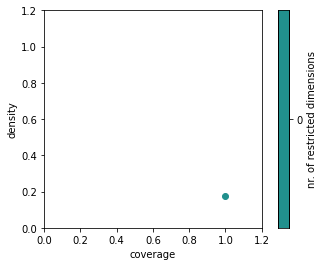

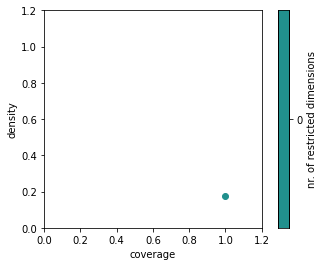

In [75]:
Prim4 = prim.Prim(x[0],ypart3,threshold = 0.5, peel_alpha=0.05)
box4 = Prim4.find_box()
box4.show_tradeoff()

In [74]:
from ema_workbench.analysis.prim import run_constrained_prim
Prim5 = run_constrained_prim(xpart3, experiments['interest'])
box5 = Prim5.find_box()
box5.show_tradeoff()

# Remarks on PCA 
We used PCA to preprocess the input datasets for PRIM. The use of PCA did not result in a better coverage and density tradeoff. We also tested to use fewer variables from the PCA, but that didn't change the tradeoff positively. 